In [71]:
#load libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [73]:
#load datasets
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [75]:
#normalize
x_train= x_train/255
x_test= x_test/255

In [77]:
#flatten
x_train= x_train.reshape(-1, 28*28)
x_test= x_test.reshape(-1, 28*28)

In [79]:
#one hot encoding
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [81]:
#build
model= Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
#compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [85]:
#train
history= model.fit(
    x_train,y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8022 - loss: 0.7048 - val_accuracy: 0.9446 - val_loss: 0.1934
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9503 - loss: 0.1695 - val_accuracy: 0.9552 - val_loss: 0.1501
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.1071 - val_accuracy: 0.9666 - val_loss: 0.1136
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.0805 - val_accuracy: 0.9700 - val_loss: 0.1000
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9811 - loss: 0.0645 - val_accuracy: 0.9697 - val_loss: 0.1040
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0497 - val_accuracy: 0.9745 - val_loss: 0.0893
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0415 - val_accuracy: 0.9719 - val_loss: 0.0961
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0317 - val_accuracy: 

In [87]:
#evaluate
test_loss, test_acc= model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0953
Test Accuracy: 0.9764


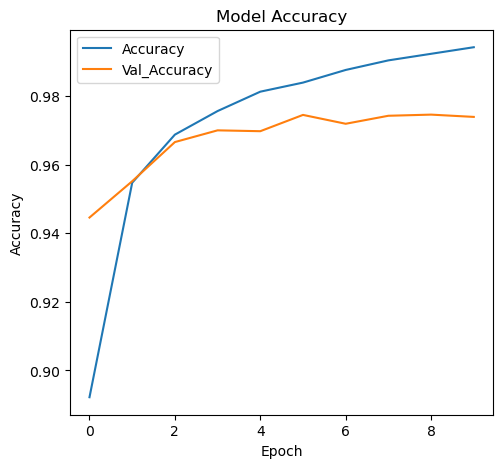

In [89]:
#visualize

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val_Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

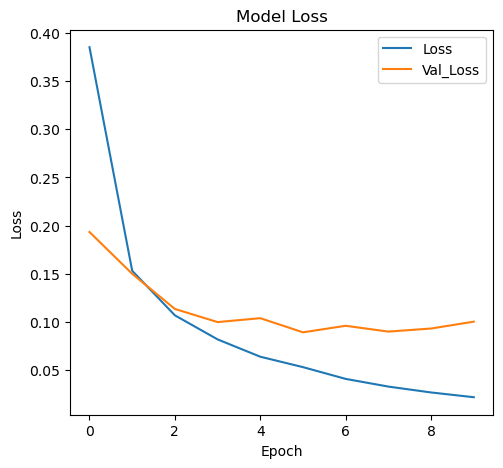

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val_Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()